In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-05-20 17:09:26.052376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747750166.122924  194884 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747750166.142393  194884 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747750166.244456  194884 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747750166.244489  194884 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747750166.244494  194884 computation_placer.cc:177] computation placer alr

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test =  X_train.astype('float32') / 255, X_test.astype('float32') / 255

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [3]:
fours_indexes = np.where(y_train == 4)
only_fours_y_train = y_train[fours_indexes]
only_fours_X_train = X_train[fours_indexes]

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(8, activation='relu'),

    tf.keras.layers.Dense(7*7*16, activation='relu'),
    tf.keras.layers.Reshape((7,7,16)),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1, 3, padding='same', activation='sigmoid'), 
])

model.compile(optimizer='adam', loss='mse')
#model.summary()

model.fit(only_fours_X_train, only_fours_X_train, epochs=20)

I0000 00:00:1747750171.764900  194884 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6257 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/20


I0000 00:00:1747750174.229556  194996 service.cc:152] XLA service 0x701f4000ef70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747750174.229587  194996 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-05-20 17:09:34.281196: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747750174.625261  194996 cuda_dnn.cc:529] Loaded cuDNN version 90300


 45/183 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1987

I0000 00:00:1747750178.244854  194996 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


183/183 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.1255
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0534
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0359
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0282
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0261
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0248
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0235
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0227
Epoch 9/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0218
Epoch 10/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0213
Epoch 11/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0206
Epoch 12/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0204
Epoch 13/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0201
Epoch 14/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0199
Epoch 15/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.019

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


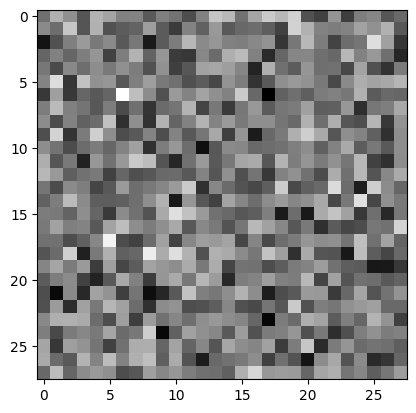

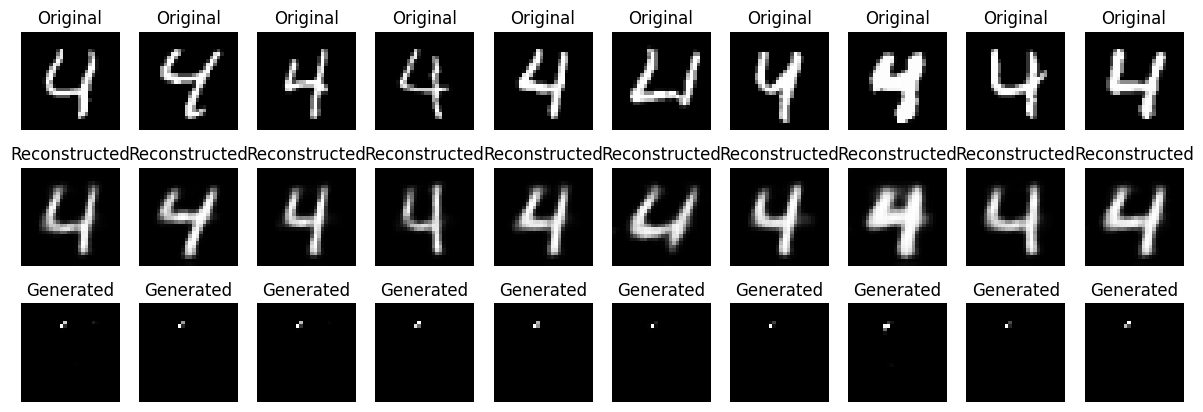

In [9]:
# Select images of digit 9 from the test set
digit_class = 4
indexes = np.where(y_test == digit_class)[0]
selected_indexes = indexes[:10]
selected_images = X_test[selected_indexes]

# Reconstruct the selected images
reconstructed_images = model.predict(selected_images)

#noised image
random_noise = np.random.normal(-1.0, 1.0, (10, 28, 28, 1))
generated_images = model.predict(random_noise)

plt.imshow(random_noise[0].reshape(28,28), cmap='gray')

# Display original, reconstructed, and randomized images from noise
n = 10  # Number of images to display
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis(False)

    # Generated images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title('Generated')
    plt.axis(False)

plt.show()